# Data Loading

In [113]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
#loading files
csv_files = ["/content/drive/MyDrive/archive (3)/April_2023.csv", "/content/drive/MyDrive/archive (3)/August_2022.csv", "/content/drive/MyDrive/archive (3)/December_2022.csv", "/content/drive/MyDrive/archive (3)/February_2023.csv", "/content/drive/MyDrive/archive (3)/January_2023.csv", "/content/drive/MyDrive/archive (3)/July_2022.csv", "/content/drive/MyDrive/archive (3)/June_2022.csv", "/content/drive/MyDrive/archive (3)/March_2023.csv", "/content/drive/MyDrive/archive (3)/May_2023.csv", "/content/drive/MyDrive/archive (3)/November_2022.csv", "/content/drive/MyDrive/archive (3)/October_2022.csv", "/content/drive/MyDrive/archive (3)/September_2022.csv"]
dataframe = []
for file in csv_files:
  df = pd.read_csv(file)
  dataframe.append(df)

merged_df = pd.concat(dataframe, ignore_index=True)

In [116]:
merged_df.head()

,Order time,Pickup address,Ride price,Booking fee,Toll fee,Cancellation fee,Tip,Currency,Payment method,Payment time,Distance,State
0,30.04.2023 22:44,"Valley view park estate, Mombasa Road, Mlolong...",450.0,21.22,0.0,0.0,0.0,Ksh,Cash,30.04.2023 23:00,6.0,Finished
1,30.04.2023 21:45,"Embakasi, Nairobi",840.0,39.82,0.0,0.0,0.0,Ksh,Cash,30.04.2023 22:30,18.0,Finished
2,30.04.2023 21:22,"Naivas Supermarket Fedha, Nairobi",260.0,12.60,0.0,0.0,0.0,Ksh,Cash,30.04.2023 21:46,1.0,Finished
3,30.04.2023 20:50,"Hamza, Nairobi",470.0,22.52,0.0,0.0,0.0,Ksh,Cash,30.04.2023 21:14,5.0,Finished
4,30.04.2023 20:09,"W Place Apartments, Westlands Close, Nairobi",640.0,30.39,0.0,0.0,0.0,Ksh,Cash,30.04.2023 20:40,12.0,Finished


# Data Understanding

In [117]:
#shape of data
merged_df.shape

(2617, 12)

In [118]:
#missing values
merged_df.isnull().sum()

Order time          0
Pickup address      0
Ride price          0
Booking fee         0
Toll fee            0
Cancellation fee    0
Tip                 0
Currency            0
Payment method      0
Payment time        0
Distance            0
State               0
dtype: int64

In [119]:
#duplicates
merged_df.duplicated().sum()

0

# EDA & Statistical Analysis

## Descriptive Statistics

In [120]:
numerical_stats = merged_df[['Ride price', 'Booking fee', 'Toll fee', 'Cancellation fee', 'Tip', 'Distance']].describe()
print(numerical_stats)

# counts and percentages for categorical columns
payment_method_counts = merged_df['Payment method'].value_counts()
payment_method_percentages = merged_df['Payment method'].value_counts(normalize=True) * 100
print(payment_method_counts)
print(payment_method_percentages)

        Ride price  Booking fee     Toll fee  Cancellation fee          Tip  \
count  2617.000000  2617.000000  2617.000000            2617.0  2617.000000   
mean    465.861292    16.163982     2.044326               0.0     0.114635   
std     257.243767    11.895241    13.210870               0.0     3.655962   
min     180.000000     0.000000     0.000000               0.0     0.000000   
25%     270.000000     8.550000     0.000000               0.0     0.000000   
50%     410.000000    14.320000     0.000000               0.0     0.000000   
75%     580.000000    22.260000     0.000000               0.0     0.000000   
max    2390.000000    93.200000   200.000000               0.0   150.000000   

          Distance  
count  2617.000000  
mean      9.380206  
std       6.716197  
min       0.000000  
25%       4.000000  
50%       8.000000  
75%      13.000000  
max      61.000000  
Cash            2559
Bolt Payment      58
Name: Payment method, dtype: int64
Cash            97.783

### From the statistical analysis, we can see the mean price for a ride is ksh 465 with the highest paid price being ksh 2390


### The averge booking fee is ksh 16, with the highest tip given by a client is ksh 150

### There is no cancellation fee charged on the driver

## Visualizing the Most common Order Hours

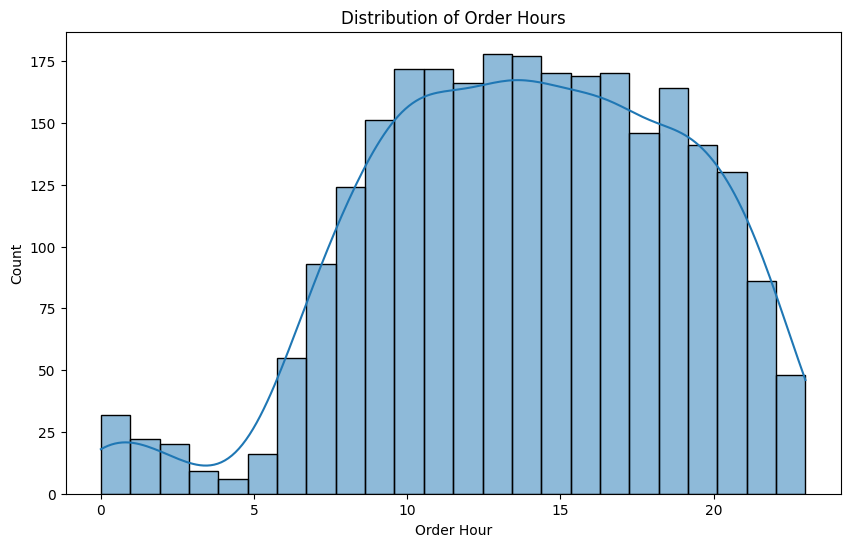

In [121]:

# Convert 'Order time' to datetime
merged_df['Order time'] = pd.to_datetime(merged_df['Order time'], format='%d.%m.%Y %H:%M')
merged_df['Order hour'] = merged_df['Order time'].dt.hour
# Create a histogram to visualize the distribution of order hours
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Order hour', bins=24, kde=True)
plt.xlabel('Order Hour')
plt.ylabel('Count')
plt.title('Distribution of Order Hours')
plt.show()

### Order hours peak from 10am to 5pm with 1pm -3pm being the most busy hours

## Visualizing Driver Earnings

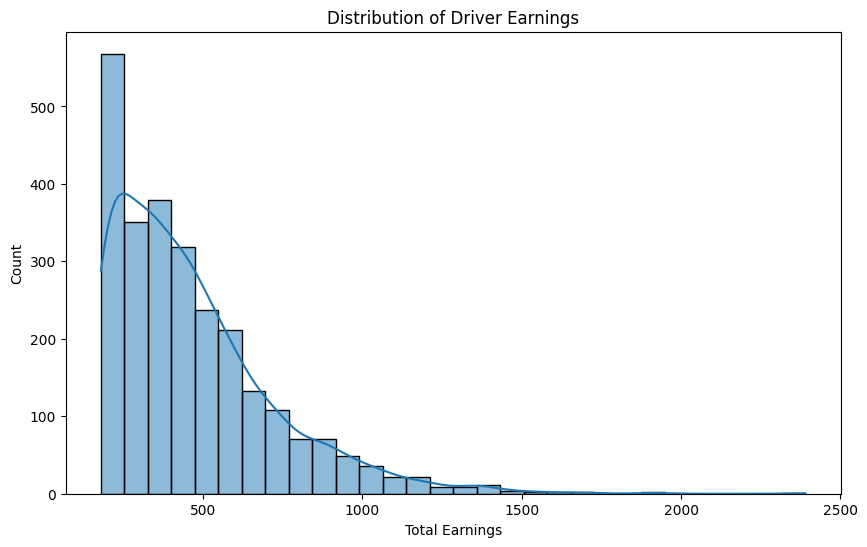

In [122]:

# Visualize driver earnings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Ride price'], bins=30, kde=True)
plt.xlabel('Total Earnings')
plt.ylabel('Count')
plt.title('Distribution of Driver Earnings')
plt.show()


### Commonly, most rides are below 500 as they have a higher count

# Modelling

## Time Series Forecasting

<ipython-input-123-3c366755ffd1>:12: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  forecast = model.fit(smoothing_level=0.2, smoothing_slope=0.2).forecast(30)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


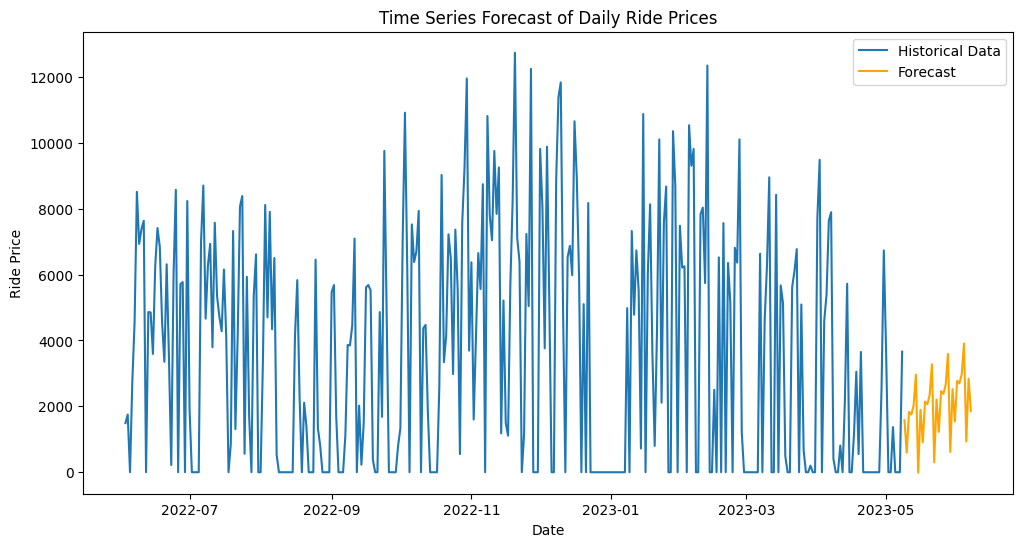

In [123]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# forecast ride prices over time
merged_df['Order time'] = pd.to_datetime(merged_df['Order time'], format='%d.%m.%Y %H:%M')
merged_df.set_index('Order time', inplace=True)

# Resample data to a daily frequency
daily_rides = merged_df['Ride price'].resample('D').sum()

# time series forecasting using Holt-Winters
model = ExponentialSmoothing(daily_rides, trend='add', seasonal='add', seasonal_periods=7)
forecast = model.fit(smoothing_level=0.2, smoothing_slope=0.2).forecast(30)

# Visualize the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_rides, label='Historical Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Ride Price')
plt.title('Time Series Forecast of Daily Ride Prices')
plt.legend()
plt.show()


Conducted Time series analysis using holtwinters to forecast prices for the next 30 days.